In [23]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score


In [24]:
diabetes=load_diabetes()

In [25]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [26]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [27]:
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [28]:
df["target"]=diabetes.target

In [29]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [30]:
sns.pairplot(df)

In [31]:
x=df.drop(columns=["target"])
y=df["target"]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [33]:
print(x_train.shape)
print(y_train.shape)

(353, 10)
(353,)


In [34]:
print(x_test.shape)
print(y_test.shape)

(89, 10)
(89,)


In [35]:
lr=LinearRegression()

In [36]:
lr.fit(x_train,y_train)  # training data


LinearRegression()

In [37]:
lr.coef_

array([ -15.60817205, -225.81352016,  506.5218141 ,  336.29118339,
       -679.99823518,  422.14206354,   25.44769146,   81.7554131 ,
        685.87320231,  151.36377945])

In [38]:
lr.intercept_

153.06802188530202

In [39]:
y_pred=lr.predict(x_test)


In [40]:
r2_score(y_test,y_pred)

0.5110667565487971

In [41]:
mse1=mse(y_test,y_pred)
mse1
np.sqrt(mse1)

52.80094994974166

## Regularization
-Ridge

In [51]:
r=Ridge()
r.fit(x_train,y_train)

Ridge()

In [52]:
y_pred_r=r.predict(x_test)
print("r2",r2_score(y_test,y_pred_r))
print("rmse",np.sqrt(mse(y_test,y_pred_r)))
r.coef_

r2 0.41214998160258143
rmse 57.89622144775344


array([  26.89540767,  -61.96584155,  274.19203481,  191.31584854,
         15.57921529,  -15.35291591, -138.90892417,  105.56053189,
        233.21327649,  141.10617887])

In [53]:
r=Ridge(alpha=0) ## it work as linear regression
r.fit(x_train,y_train)

Ridge(alpha=0)

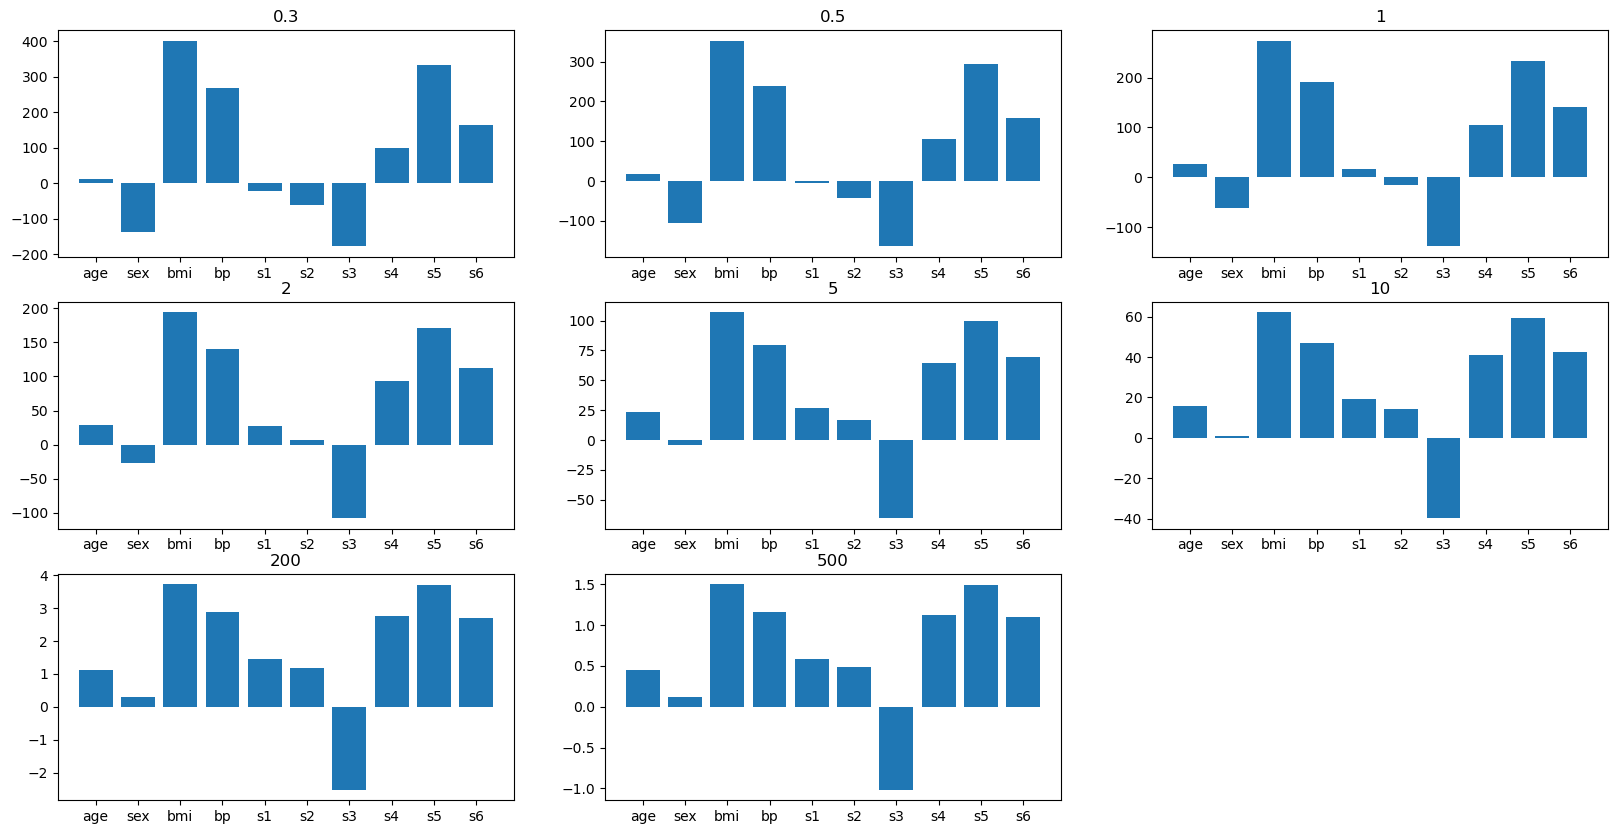

[54.62090086457428, 55.659697881595704, 57.89622144775344, 61.05750578332797, 65.98927475412634, 69.41684733994659, 75.09726275909708, 75.34449425755709]


In [62]:
l=[0.3,0.5,1,2,5,10,200,500]
co=[]
error=[]
pos=1
k=0
plt.figure(figsize=(20,10))
for i in l:
    r=Ridge(alpha=i)
    r.fit(x_train,y_train)
    c=r.coef_.tolist()
    co.append(c)
    
    y_ridge_pred=r.predict(x_test)
    mse1=mse(y_test,y_ridge_pred)
    rmse=np.sqrt(mse1)
    error.append(rmse)
    plt.subplot(3,3,pos)
    plt.bar(diabetes.feature_names,co[k])
    plt.title(i)
    k=k+1
    pos=pos+1
plt.show()
print(error)
